# NBA Game Predictor

We will be using a Logistic Regression model to predict the outcome of NBA games

Note: The model I made just predicts the outcome of the game, before I tried to make a model predicting the score but it gave very poor results. You can maybe play around with my model or try a different one to get it to work for predicting total points

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as sm
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sqlite3

In [101]:
# Download the file basketball.sqlite, I added it to the github. Change the line
# below to whatever the filepath is where you save the file
con = sqlite3.connect("/content/drive/My Drive/ECE539/basketball.sqlite")
df = pd.read_sql_query("SELECT * from Game", con)

In [102]:
# Some data preprocessing, a lot of the older data has missing values or are too
# far in the past to be a relevant predictor so I just took all the data for the
# games from 2000 and on, it still gives a pretty good sample size
n = 37275
df = df.iloc[n:]

# Extract the features we want for the model, these are the stats that I felt
# are best to use. If you want to add any other features just add the name to
# the list, you can use the kaggle link to the dataset to see the column names
df = df[['WL_HOME', 'FG_PCT_HOME', 'FG3_PCT_HOME', 'REB_HOME', 'AST_HOME',
       'TOV_HOME', 'FG_PCT_AWAY', 'FG3_PCT_AWAY', 'REB_AWAY', 'AST_AWAY',
       'TOV_AWAY']]

# Several of the columns had their numbers in string format but needed to be
# converted to float for the model to work. It was giving me an error trying to
# convert from string to float, so the way around that I found was to convert to
# an int, then convert all the columns to floats. I also converted the home W/L
# to a 0 if its an L, 1 if its a W

# Convert string values to ints
for i in range(len(df)):
  if(df.iat[i,0] == 'L'):
    df.iat[i,0] = np.int64(0)
  else:
    df.iat[i,0] = np.int64(1)
  df.iat[i,3] = np.int64(df.iat[i,3])
  df.iat[i,4] = np.int64(df.iat[i,4])
  df.iat[i,5] = np.int64(df.iat[i,5])
  df.iat[i,8] = np.int64(df.iat[i,8])
  df.iat[i,9] = np.int64(df.iat[i,9])
  df.iat[i,10] = np.int64(df.iat[i,10])    

# Convert ints to floats
df[['WL_HOME', 'FG_PCT_HOME', 'FG3_PCT_HOME', 'REB_HOME', 'AST_HOME',
       'TOV_HOME', 'FG_PCT_AWAY', 'FG3_PCT_AWAY', 'REB_AWAY', 'AST_AWAY',
       'TOV_AWAY']] = df[['WL_HOME', 'FG_PCT_HOME', 'FG3_PCT_HOME', 'REB_HOME', 'AST_HOME',
       'TOV_HOME', 'FG_PCT_AWAY', 'FG3_PCT_AWAY', 'REB_AWAY', 'AST_AWAY',
       'TOV_AWAY']].astype(float)

# Display dataset statistics
df.describe(include='all').apply(lambda s: s.apply(lambda x: format(x, 'g'))).transpose()

,count,mean,std,min,25%,50%,75%,max
WL_HOME,25173,0.59254,0.491372,0,0,1,1,1
FG_PCT_HOME,25173,0.460435,0.0566814,0.247,0.422,0.459,0.5,0.684
FG3_PCT_HOME,25173,0.357493,0.117093,0,0.286,0.357,0.429,1
REB_HOME,25173,43.2449,6.62123,9,39,43,48,72
AST_HOME,25173,22.7961,5.16883,3,19,23,26,50
TOV_HOME,25173,14.2811,3.89082,1,12,14,17,32
FG_PCT_AWAY,25173,0.448835,0.055331,0.239,0.411,0.448,0.486,0.674
FG3_PCT_AWAY,25173,0.349639,0.115191,0,0.276,0.35,0.423,1
REB_AWAY,25173,41.9105,6.51255,7,37,42,46,81
AST_AWAY,25173,21.3537,5.08821,4,18,21,25,46


In [111]:
# Separate the features into X, y is the value we want to predict which is home
# win or loss.
X = df.iloc[:,1:]
y = df.iloc[:,0]

# I chose a 70/30 train/test split. random_state can be any number, it just fixes
# the results each time you run. If you want a different random selection and
# results each time, then just delete random_state.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the model.
model = LogisticRegression(max_iter=len(X_train))

# Fit the model using training data.
model.fit(X_train,y_train)

# Predict outcome based on model for test set.
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


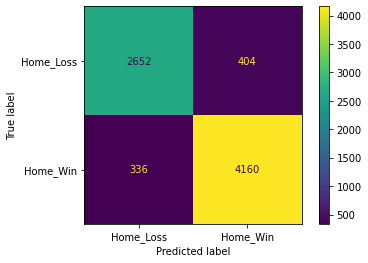

accuracy: 0.9020127118644068
R2 score: 0.5932626558104004


In [112]:
# Plot the confusion matrix
Labels = ['Home_Loss', 'Home_Win']
sm.plot_confusion_matrix(model, X_test, y_test,display_labels=Labels,values_format = '.5g')
plt.show()

# Display accuracy of model predictions
print("accuracy:",sm.accuracy_score(y_test, y_pred)) 
print("R2 score:",sm.r2_score(y_test,y_pred))